<a href="https://colab.research.google.com/github/Pipe-13/InteligenciaArtificial/blob/main/Parcial2YelpReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **IMPORTACIÓN DE LIBRERIAS**



In [26]:
import pandas as pd
# Graficos
import seaborn as sns
import matplotlib.pyplot as plt
# NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Modelo
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



1.   **CARGA Y PREPARACIÓN DE DATOS**



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559999 entries, 0 to 559998
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  559999 non-null  int64 
 1   text       559999 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.5+ MB


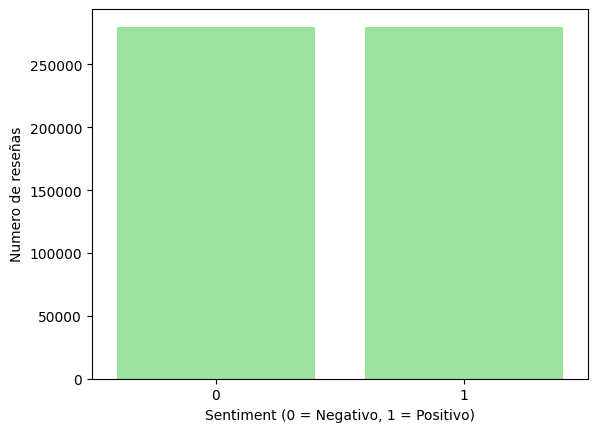

In [27]:
# 1.1 Importación del archivo
df = pd.read_csv('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL/yelp_reviews.csv')

# 1.2 Correción inicial
df.columns = ["sentiment","text"]
df['sentiment'] = df['sentiment'].map({1: 0, 2: 1})
df.info()

# 1.3 Distribución de la variable objetivo
sns.countplot(x='sentiment', data=df)
sns.countplot(x='sentiment', data=df, color='#90EE90')
plt.xlabel('Sentiment (0 = Negativo, 1 = Positivo)')
plt.ylabel('Numero de reseñas')
plt.show()

In [28]:
# 1.4 Descarga de recursos para limpieza de datos
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


2.   **PREPROCESAMIENTO DE TEXTO**



In [29]:
#2.1 Función para procesar el texto:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    clean_text = ' '.join(tokens)
    return clean_text

df['clean_text'] = df['text'].apply(preprocess_text)

3.   **MODELADO Y EVALUACIÓN (PARTE A - BOLSA DE PALABRAS)**



In [30]:
#3.1 Creación del modelo
x = df['clean_text']
y = df['sentiment']

vectorizer = CountVectorizer()
x_vectorized = vectorizer.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Precision del modelo: 0.9220


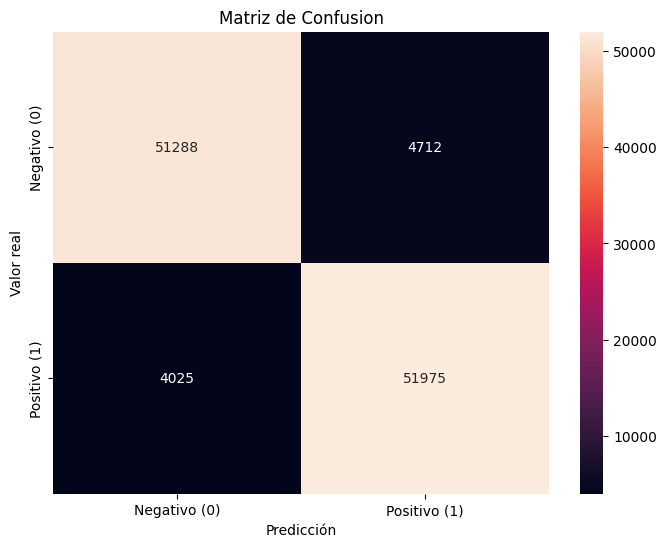

In [31]:
# 3.2 Evaluación del modelo y matriz de confusión
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Precision del modelo: {accuracy:.4f}')

cnf_mtrx = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cnf_mtrx, annot=True, fmt="d",
            xticklabels=['Negativo (0)', 'Positivo (1)'],
            yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusion")
plt.show()

4.   **MODELADO Y EVALUACIÓN (PARTE B - TF-IDF)**



In [32]:
# 4.1 Creacion del modelo tfidf
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

model_tfidf = LogisticRegression()
model_tfidf.fit(X_train, y_train)

LogisticRegression()

Precision del modelo: 0.9250


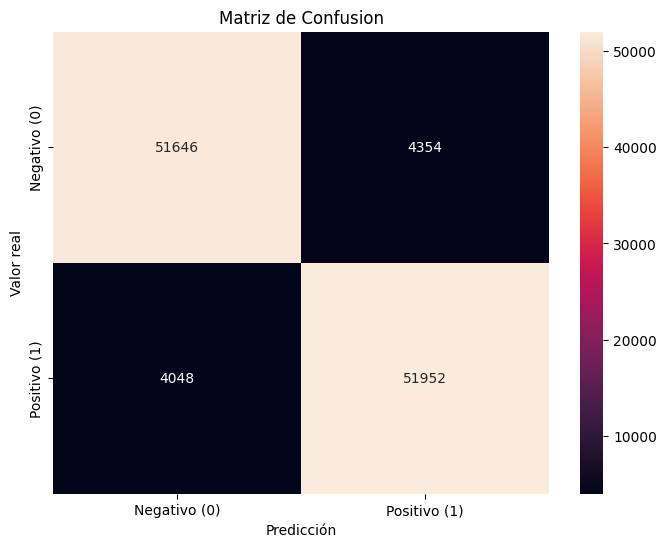

In [33]:
# 4.2 Evaluacion del modelo tfidf y matriz de confusión
y_pred_tfidf = model_tfidf.predict(X_test)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f'Precision del modelo: {accuracy_tfidf:.4f}')

# Matriz de confusión
cnf_mtrx_tfidf = confusion_matrix(y_test, y_pred_tfidf)

plt.figure(figsize=(8,6))
sns.heatmap(cnf_mtrx_tfidf, annot=True, fmt="d",
            xticklabels=['Negativo (0)', 'Positivo (1)'],
            yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusion")
plt.show()

5.   **CONCLUSIÓN Y ANALISIS**



El modelo basado en **TF-IDF con Regresión Logística** obtuvo un rendimiento superior al modelo de **Bolsa de Palabras**,
alcanzando una precisión del **92.5%**, ligeramente mayor frente al **92.20%** obtenido con la representación de frecuencia simple.
Además, el modelo TF-IDF mostró una mejor capacidad para identificar correctamente las reseñas negativas, al presentar un menor número de falsos negativos.
Este resultado indica que el enfoque TF-IDF logra capturar con mayor eficacia la relevancia de las palabras dentro del contexto del texto,
mejorando la discriminación entre opiniones positivas y negativas. Por lo tanto, se recomienda implementar el modelo TF-IDF,
ya que ofrece un análisis más preciso, robusto y representativo de los sentimientos expresados en las reseñas de Yelp.